In [2]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")
import matplotlib.pyplot as plt


#with step
data1 = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Flow Measurements\Operations\PlusPetrol_LC_Test_Movil\PAD_G2\LC-3083\Log20022021.csv')
#linear
#data1 = pd.read_csv(r'D:\Weatherford\Flow Measurements\Pilotos de Prueba\PLUSPETROL - LC - G2\DATA_Files\AFC_Files\logs\Log06082020.csv')
#data1 = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\PowerBI\logs\Log14102020.csv')


ds_FP = data1[['Time', 'Pressure[Bar]', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',
       'WaterCut[%]', 'Xl', 'WWC[%]', 'ch1[nA]', 'ch2[nA]', 'ch3[nA]',
       'ch4[nA]', 'ch5[nA]','TotWLR[%]', 'TotGOR', 'GVF[%]', 'XLM',
       'Frg_dp_out', 'GasDen[kg/m3]', 'GasVisc[cP]', 'Kappa',
       'LiqDen[kg/m3]', 'LiqVisc[cP]',
       ]]

ds_Q = data1[['Time','Pressure[Bar]','Temperature[C]','WaterCut[%]', 'WWC[%]','Qg[m3/s]', 'Ql[m3/s]', 'Qo[m3/s]',
       'Qw[m3/s]', 'QgStd[m3/s]', 'QlStd[m3/s]', 'QoStd[m3/s]', 'QwStd[m3/s]',
       'TotWLR[%]', 'TotGOR', 'GVF[%]']]

#adding columns with 24hs rates

ds_Q[["Qg[m3/d]"]] = ds_Q[["Qg[m3/s]"]] * 86400
ds_Q[["Ql[m3/d]"]] = ds_Q[["Ql[m3/s]"]] * 86400
ds_Q[["Qo[m3/d]"]] = ds_Q[["Qo[m3/s]"]] * 86400
ds_Q[["Qw[m3/d]"]] = ds_Q[["Qw[m3/s]"]] * 86400
ds_Q[["QgStd[m3/d]"]] = ds_Q[["QgStd[m3/s]"]] * 86400
ds_Q[["QlStd[m3/d]"]] = ds_Q[["QlStd[m3/s]"]] * 86400
ds_Q[["QoStd[m3/d]"]] = ds_Q[["QoStd[m3/s]"]] * 86400
ds_Q[["QwStd[m3/d]"]] = ds_Q[["QwStd[m3/s]"]] * 86400

#cleaning columns

to_drop = ['Qg[m3/s]', 'Ql[m3/s]', 'Qo[m3/s]',
       'Qw[m3/s]', 'QgStd[m3/s]', 'QlStd[m3/s]', 'QoStd[m3/s]', 'QwStd[m3/s]',
       'TotGOR', 'GVF[%]']

ds_Qf= ds_Q.drop(to_drop, axis=1)


print("Data Loaded OK")


Data Loaded OK


C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [3]:
data1.columns.values

array(['Well No.', 'Time', 'Pressure[Bar]', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality', 'Gamma_Dens[kg/m3]', 'Raw_Dens',
       'WaterCut[%]', 'Xl', 'WWC[%]', 'ch1[nA]', 'ch2[nA]', 'ch3[nA]',
       'ch4[nA]', 'ch5[nA]', 'BrdTemp[C]', 'Qg[m3/s]', 'Ql[m3/s]',
       'Qo[m3/s]', 'Qw[m3/s]', 'QgStd[m3/s]', 'QlStd[m3/s]',
       'QoStd[m3/s]', 'QwStd[m3/s]', 'Vg[m3]', 'Vl[m3]', 'Vo[m3]',
       'Vw[m3]', 'VgStd[m3]', 'VlStd[m3]', 'VoStd[m3]', 'VwStd[m3]',
       'TotWLR[%]', 'TotGOR', 'GVF[%]', 'XLM', 'Frg_dp_out', 'mode',
       'GasDen[kg/m3]', 'GasVisc[cP]', 'Kappa', 'LiqDen[kg/m3]',
       'LiqVisc[cP]', 'ErrLMQGuess', 'Iteration_Var', 'PVT_Var',
       'MVT_Var_out', 'Sonar_Vel_Var', 'env_ok', 'Comm_Var_out',
       'PI_Status_Out', 'ErrQt', 'Vm[m/s]', 'E', 'Epsilon', 'Tau', 'Cd',
       'diffPress_Input[bar]', 'diffPressZero[bar]', 'ParamFile',
       'PVTFile', 'Rhog', 'Rhol', 'Rhoo', 'Rhow', 'ALPHA1'], dtype=object)

In [21]:
data1[['Pressure[Bar]', 'Temperature[C]', 'Velocity[m/s]', 'Quality', 'DP[Bar]', 'TotWLR[%]', 'Rhog']].describe()

,Pressure[Bar],Temperature[C],Velocity[m/s],Quality,DP[Bar],TotWLR[%],Rhog
count,70490.000000,70490.000000,70490.000000,70490.000000,70490.000000,70490.000000,70490.000000
mean,96.110103,55.103627,8.664375,0.680632,0.078867,60.333065,77.774275
std,3.461256,3.083110,0.788137,0.093064,0.013109,4.812552,4.295341
min,0.000000,0.000000,6.989401,0.329287,-0.018678,0.000000,0.000000
25%,95.990704,52.631016,7.892021,0.623838,0.068548,56.691812,77.397175
50%,96.125496,54.160439,8.696582,0.673667,0.077582,57.039864,78.106331
75%,96.264128,57.899939,9.409970,0.765539,0.089202,66.057021,78.570541
max,97.287865,60.154167,11.370749,0.888643,0.171432,66.275738,88.793096


In [4]:


#ds_FP.to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\ds_FP_29062020.csv')
#ds_FP.describe().to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\ds_FP_described_29062020.csv')
ds_FP.describe().to_csv('D:\OneDrive\OneDrive - WFT\Compartido\PowerBI\logs\Log14102020_PT.csv')
ds_Q.describe().to_csv('D:\OneDrive\OneDrive - WFT\Compartido\PowerBI\logs\Log14102020_FlowRates.csv')

print(ds_FP.describe())

       Pressure[Bar]       DP[Bar]  Temperature[C]  Velocity[m/s]  \
count   54110.000000  54110.000000    54110.000000   54110.000000   
mean       94.316824      0.060702       62.466365       7.880481   
std         0.095296      0.039947        3.083621       2.470515   
min        94.036072      0.001254       57.638382       0.002545   
25%        94.248650      0.035556       60.488792       6.368938   
50%        94.295387      0.040314       61.263687       6.664636   
75%        94.386463      0.053784       61.925591       7.189143   
max        94.579796      0.171825       68.401009      29.951723   

            Quality   WaterCut[%]            Xl        WWC[%]       ch1[nA]  \
count  54110.000000  54110.000000  54110.000000  54110.000000  54110.000000   
mean       0.777354     68.078171      0.145326     67.354964  10193.167083   
std        0.121788     14.547627      0.027713     15.894494   3208.667994   
min       -1.000000      0.000000      0.026913      0.000000 

In [18]:
ds_Qf.isnull().sum()

Time              0
Pressure[Bar]     0
Temperature[C]    0
WaterCut[%]       0
WWC[%]            0
TotWLR[%]         0
Qg[m3/d]          0
Ql[m3/d]          0
Qo[m3/d]          0
Qw[m3/d]          0
QgStd[m3/d]       0
QlStd[m3/d]       0
QoStd[m3/d]       0
QwStd[m3/d]       0
dtype: int64

In [12]:
ds_Qf=ds_Qf[ds_Qf["TotWLR[%]"].notnull()]

In [13]:
print(ds_Qf.tail())

                     Time  Pressure[Bar]  Temperature[C]  WaterCut[%]  \
28880 2020-10-14 16:47:56      24.899019       32.872059    62.676319   
28881 2020-10-14 16:47:57      24.899359       32.860367    63.213654   
28882 2020-10-14 16:47:59      24.900167       32.860367    63.991802   
28883 2020-10-14 16:48:00      24.900375       32.858753    62.180679   
28884 2020-10-14 16:48:02      24.901575       32.860367    62.489243   

          WWC[%]  TotWLR[%]     Qg[m3/d]  Ql[m3/d]  Qo[m3/d]  Qw[m3/d]  \
28880  62.765034  50.362702  6146.823398  0.483724  0.180114  0.303609   
28881  62.804649  50.362705  6152.606646  0.489884  0.182214  0.307670   
28882  62.840858  50.362708  6193.015213  0.503730  0.187182  0.316548   
28883  62.809193  50.362712  6331.423496  0.564485  0.209936  0.354548   
28884  62.840645  50.362716  6279.078525  0.525248  0.195179  0.330069   

         QgStd[m3/d]  QlStd[m3/d]  QoStd[m3/d]  QwStd[m3/d]  
28880  151549.791909     0.475491     0.172931     0.3

In [23]:

#ds_Qf['Time'] = pd.to_datetime(ds_Qf['Time'])
period = ds_FP.index // 24

ds = ds_FP.groupby(ds_FP.index // period).mean()

#print(ds.describe())
#ds.to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\MM.csv')

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor rel

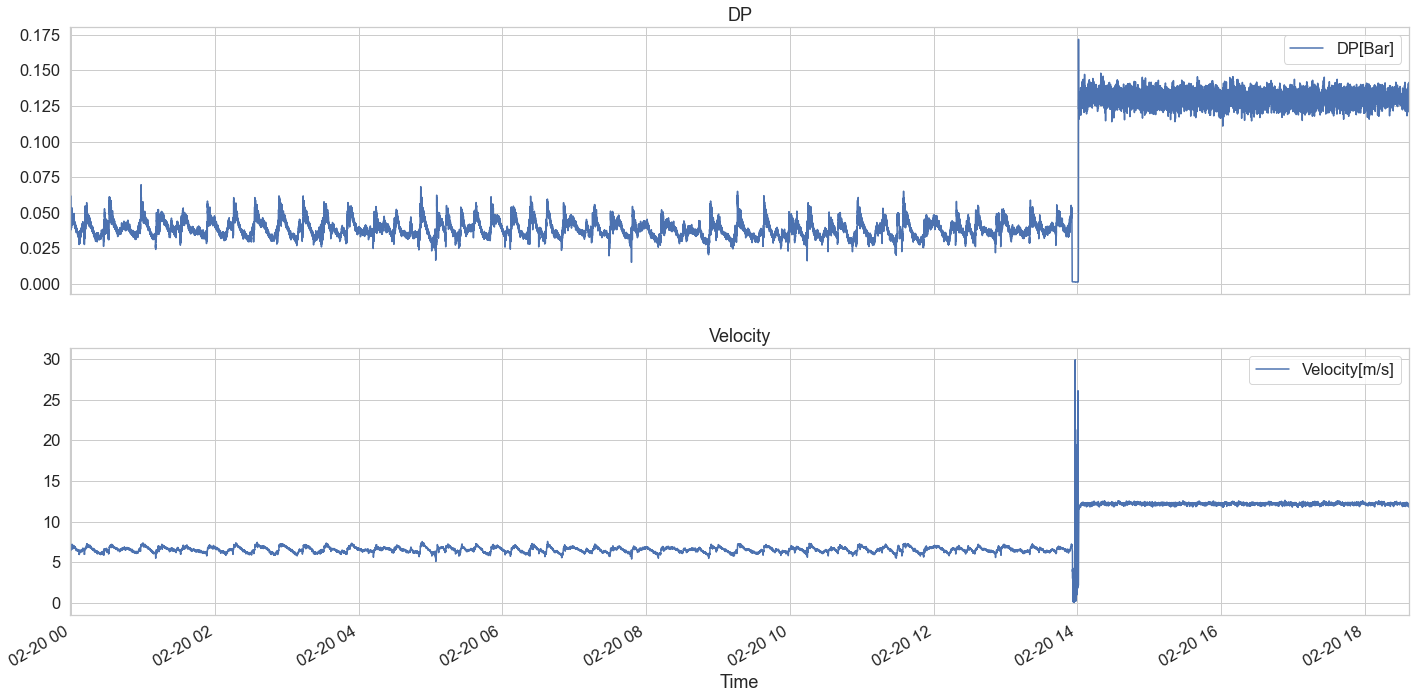

In [12]:
ds_FP['Time'] = pd.to_datetime(ds_FP['Time'])
#ds_Qf.dtypes
fig, ax = plt.subplots(2,figsize=(24,12),sharex=True)
ds_FP.plot(x='Time', y='DP[Bar]',ax=ax[0])
ds_FP.plot(x='Time', y='Velocity[m/s]',ax=ax[1])
ax[0].set(title="DP")
ax[1].set(title="Velocity")
plt.show()

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

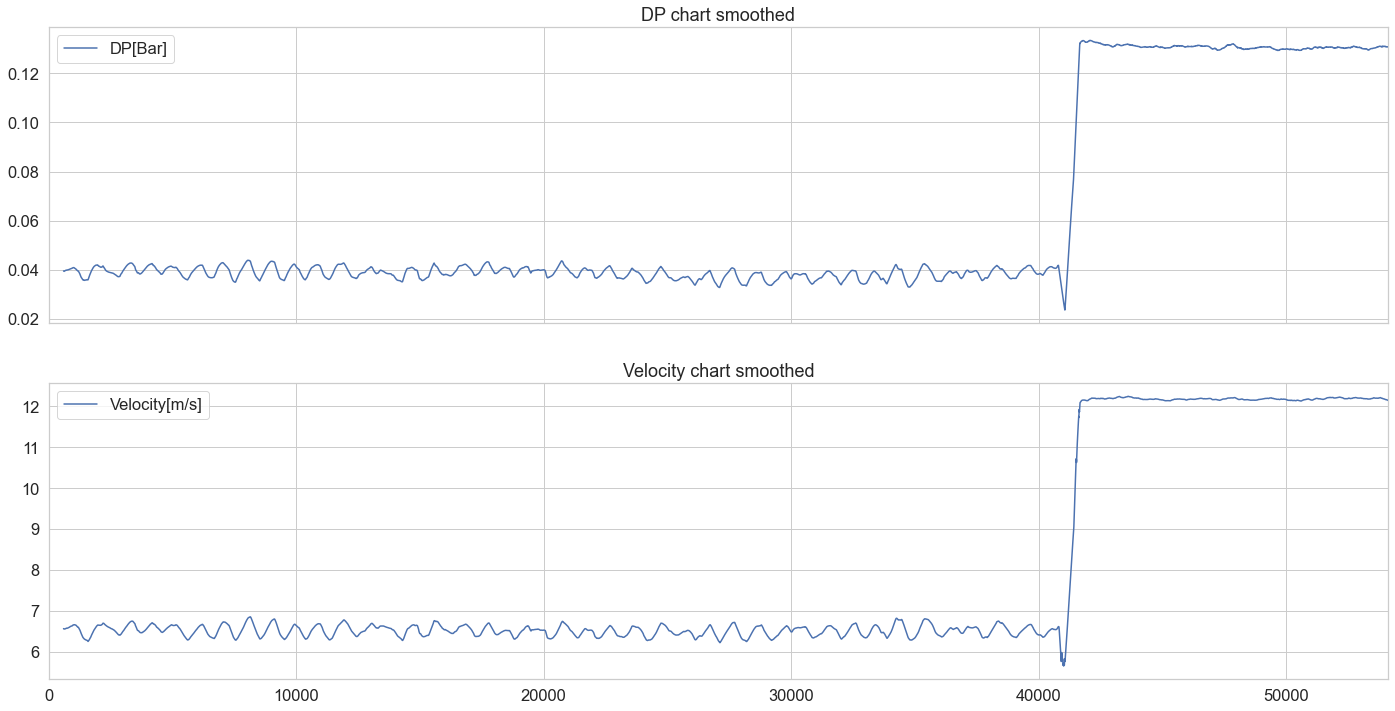

In [17]:
ds_rectified = ds_FP.drop(['Time'], axis=1)
ds_rectified = ds_rectified.apply(np.abs)
ds_envelope = ds_rectified.rolling(600).mean()


fig, ax = plt.subplots(2,figsize=(24,12),sharex=True)
ds_envelope.plot(y='DP[Bar]',ax=ax[0])
ds_envelope.plot( y='Velocity[m/s]',ax=ax[1])
ax[0].set(title="DP chart smoothed")
ax[1].set(title="Velocity chart smoothed")
plt.show()

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

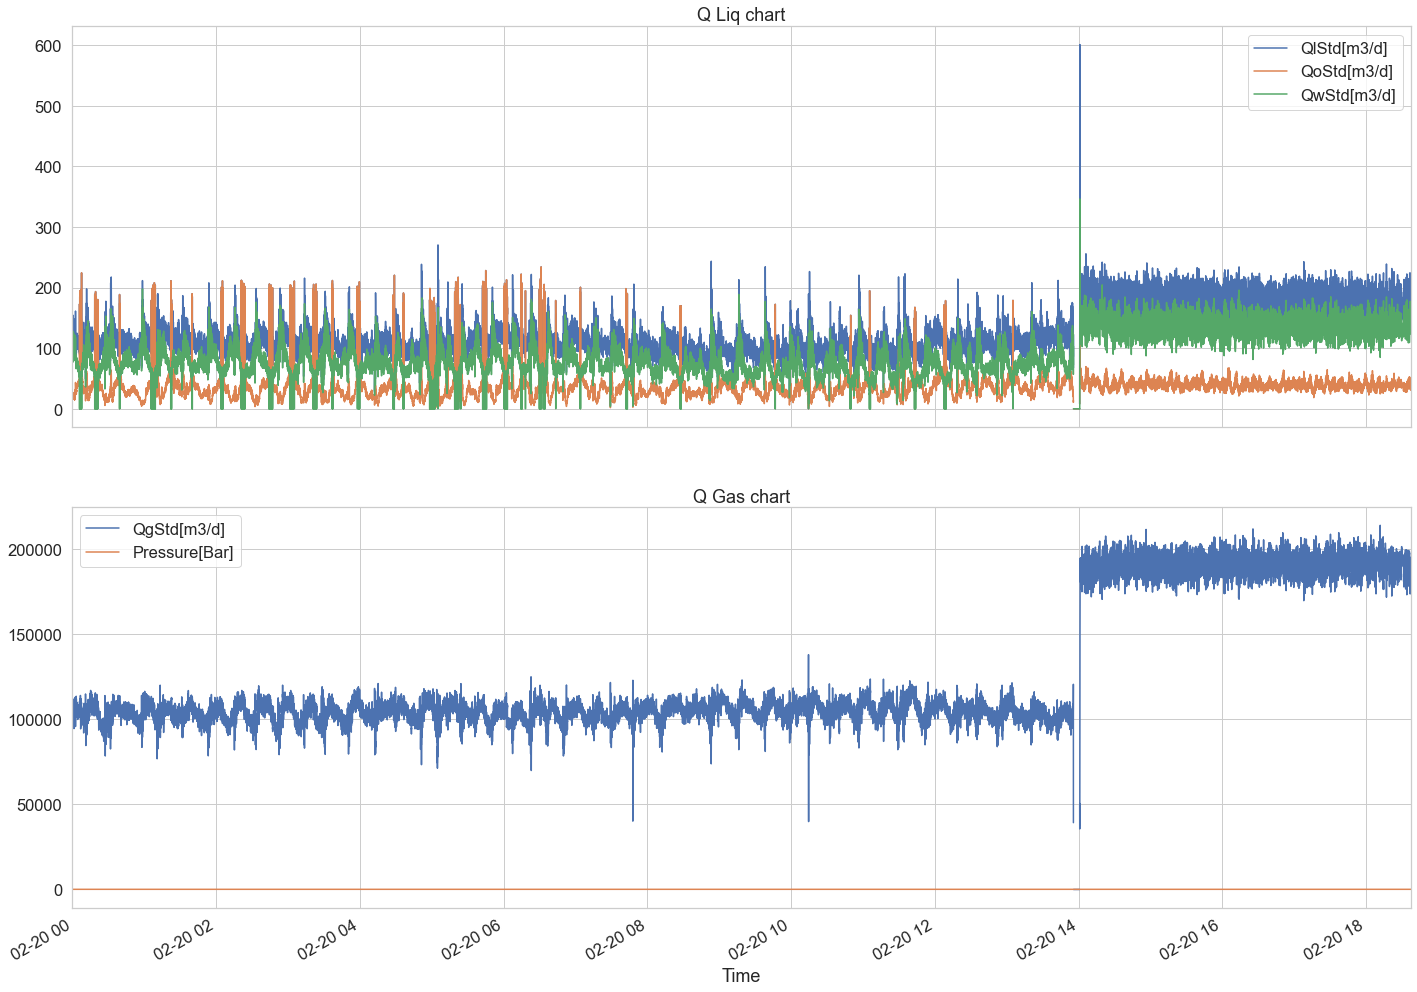

In [5]:
ds_Qf['Time'] = pd.to_datetime(ds_Qf['Time'])
#ds_Qf.dtypes
fig, ax = plt.subplots(2,figsize=(24,18),sharex=True)
ds_Qf.plot(x='Time', y=['QlStd[m3/d]','QoStd[m3/d]','QwStd[m3/d]'],ax=ax[0])
ds_Qf.plot(x='Time', y=['QgStd[m3/d]','Pressure[Bar]'],ax=ax[1])
ax[0].set(title="Q Liq chart")
ax[1].set(title="Q Gas chart")
plt.show()

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

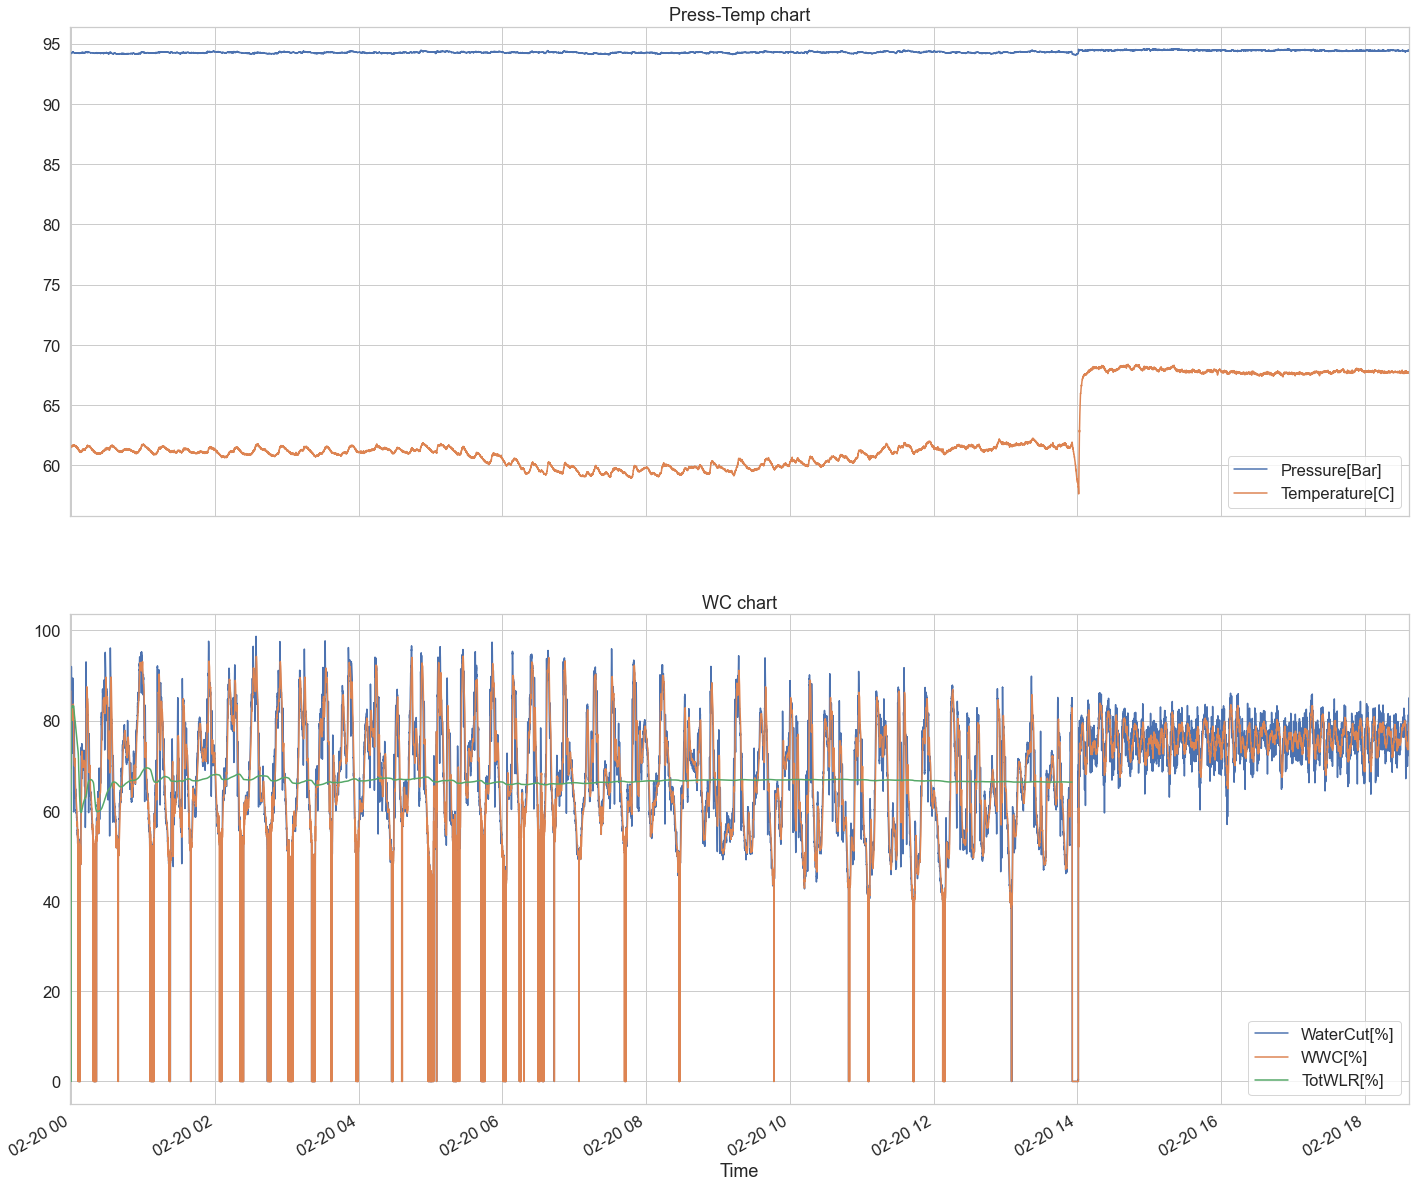

In [8]:
fig, ax = plt.subplots(2,figsize=(24,22),sharex=True)
ds_Qf.plot(x='Time', y=['Pressure[Bar]', 'Temperature[C]'],ax=ax[0])
ds_Qf.plot(x='Time', y=['WaterCut[%]', 'WWC[%]','TotWLR[%]'],ax=ax[1])
ax[0].set(title="Press-Temp chart")
ax[1].set(title="WC chart")
plt.show()
#plt.savefig('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\outputs\11062020_PT_WC.png')

[Text(0.5, 1.0, 'Liquid Flow chart smoothed')]

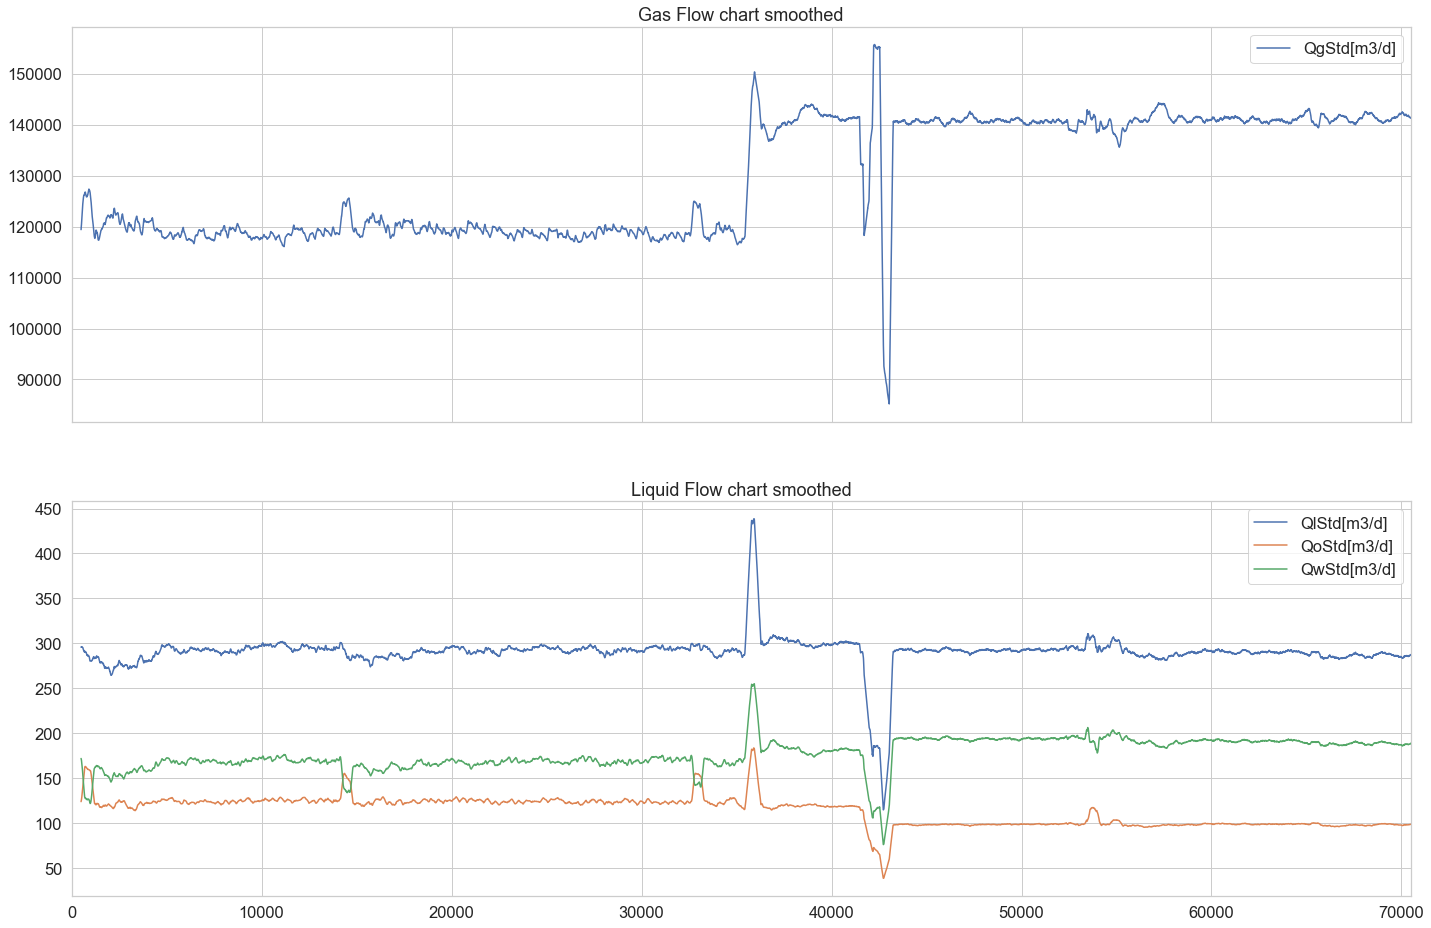

In [26]:
ds_rectified = ds_Q.drop(['Time'], axis=1)
ds_rectified = ds_rectified.apply(np.abs)
ds_envelope = ds_rectified.rolling(500).mean()

fig, ax = plt.subplots(2,figsize=(24,16),sharex=True)
ds_envelope.plot(y=['QgStd[m3/d]'], ax=ax[0])
ds_envelope.plot(y=['QlStd[m3/d]','QoStd[m3/d]','QwStd[m3/d]'], ax=ax[1])
ax[0].set(title="Gas Flow chart smoothed")
ax[1].set(title="Liquid Flow chart smoothed")
#plt.savefig('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\outputs\11062020_flowAvg.png')

[Text(0.5, 1.0, 'Water Flow chart comp')]

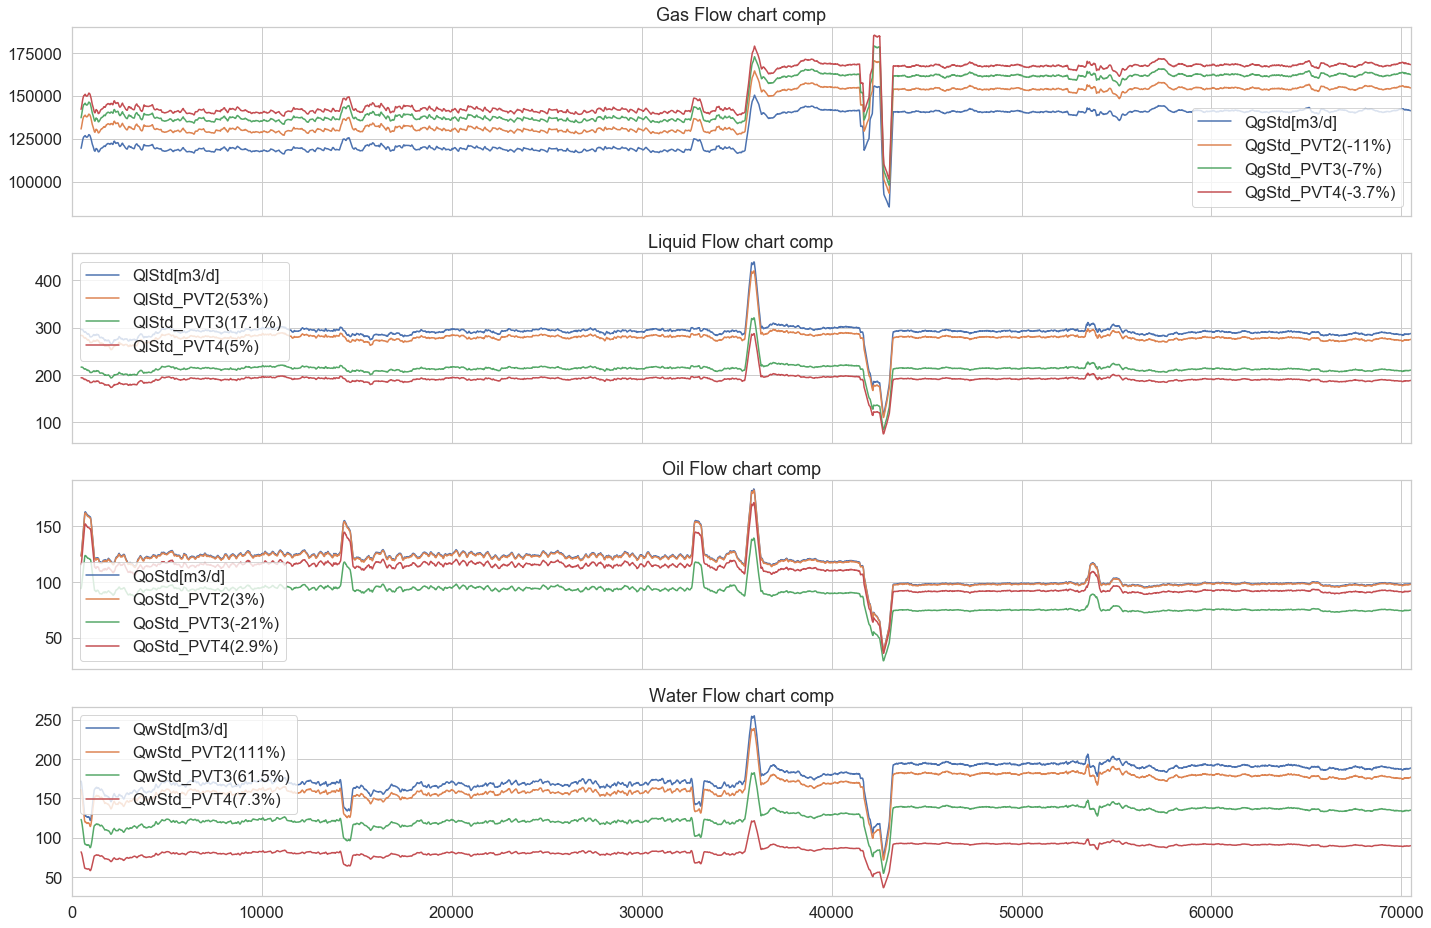

In [33]:
ds_envelope['QgStd_PVT2(-11%)']=ds_envelope['QgStd[m3/d]']*1.094
ds_envelope['QgStd_PVT3(-7%)']=ds_envelope['QgStd[m3/d]']*1.149
ds_envelope['QgStd_PVT4(-3.7%)']=ds_envelope['QgStd[m3/d]']*1.19

ds_envelope['QlStd_PVT2(53%)']=ds_envelope['QlStd[m3/d]']*0.957
ds_envelope['QlStd_PVT3(17.1%)']=ds_envelope['QlStd[m3/d]']*0.731
ds_envelope['QlStd_PVT4(5%)']=ds_envelope['QlStd[m3/d]']*0.655

ds_envelope['QoStd_PVT2(3%)']=ds_envelope['QoStd[m3/d]']*0.994
ds_envelope['QoStd_PVT3(-21%)']=ds_envelope['QoStd[m3/d]']*0.760
ds_envelope['QoStd_PVT4(2.9%)']=ds_envelope['QoStd[m3/d]']*0.933

ds_envelope['QwStd_PVT2(111%)']=ds_envelope['QwStd[m3/d]']*0.937
ds_envelope['QwStd_PVT3(61.5%)']=ds_envelope['QwStd[m3/d]']*0.716
ds_envelope['QwStd_PVT4(7.3%)']=ds_envelope['QwStd[m3/d]']*0.476


fig, ax = plt.subplots(4,figsize=(24,16),sharex=True)
ds_envelope.plot(y=['QgStd[m3/d]','QgStd_PVT2(-11%)','QgStd_PVT3(-7%)','QgStd_PVT4(-3.7%)'], ax=ax[0])
ds_envelope.plot(y=['QlStd[m3/d]','QlStd_PVT2(53%)','QlStd_PVT3(17.1%)','QlStd_PVT4(5%)'], ax=ax[1])
ds_envelope.plot(y=['QoStd[m3/d]','QoStd_PVT2(3%)','QoStd_PVT3(-21%)','QoStd_PVT4(2.9%)'], ax=ax[2])
ds_envelope.plot(y=['QwStd[m3/d]','QwStd_PVT2(111%)','QwStd_PVT3(61.5%)','QwStd_PVT4(7.3%)'], ax=ax[3])

ax[0].set(title="Gas Flow chart comp")
ax[1].set(title="Liquid Flow chart comp")
ax[2].set(title="Oil Flow chart comp")
ax[3].set(title="Water Flow chart comp")



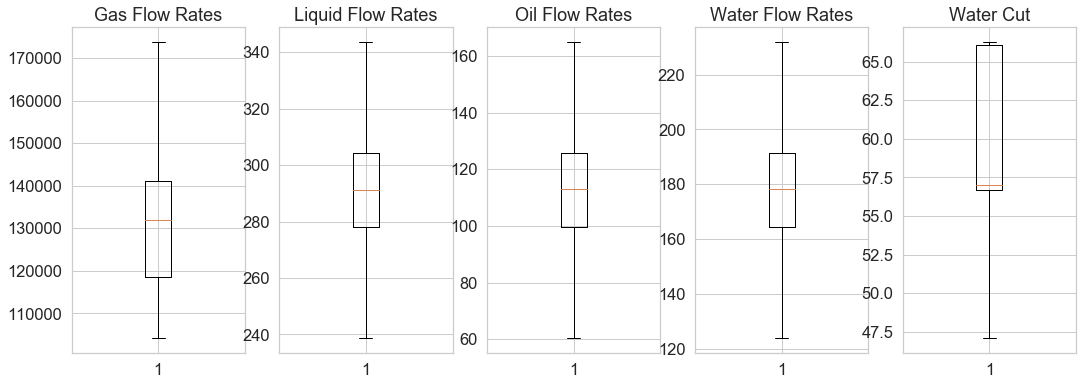

In [27]:
fig1, ax = plt.subplots(1,5,figsize=(18,6))
ax[0].set_title('Gas Flow Rates')
ax[1].set_title('Liquid Flow Rates')
ax[2].set_title('Oil Flow Rates')
ax[3].set_title('Water Flow Rates')
ax[4].set_title('Water Cut')
ax[0].boxplot(ds_Qf['QgStd[m3/d]'],showfliers=False)
ax[1].boxplot(ds_Qf['QlStd[m3/d]'],showfliers=False)
ax[2].boxplot(ds_Qf['QoStd[m3/d]'],showfliers=False)
ax[3].boxplot(ds_Qf['QwStd[m3/d]'],showfliers=False)
ax[4].boxplot(ds_Qf['TotWLR[%]'],showfliers=False)
# plt.savefig('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\outputs\10062020_BoxPlot.png')
plt.show()

In [5]:
ds_FP.describe()

,Pressure[Bar],DP[Bar],Temperature[C],Velocity[m/s],Quality,WaterCut[%],Xl,WWC[%],ch1[nA],ch2[nA],...,TotWLR[%],TotGOR,GVF[%],XLM,Frg_dp_out,GasDen[kg/m3],GasVisc[cP],Kappa,LiqDen[kg/m3],LiqVisc[cP]
count,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,...,25591.000000,25591.000000,25590.000000,25590.000000,25591.000000,25591.000000,2.559100e+04,25591.000000,25591.000000,25591.000000
mean,93.679057,0.045043,53.974419,6.818852,0.512706,61.122348,0.789623,61.121524,5630.238884,130.276545,...,71.737686,2165.542133,82.617563,0.664299,1.024608,86.210861,1.474098e-05,1.526935,851.906462,0.000591
std,0.217744,0.002114,0.471343,0.098715,0.078333,0.350642,0.004412,0.286692,159.235555,6.786136,...,0.640241,38.638355,2.276444,0.106384,0.049411,0.198147,1.452369e-08,0.000811,1.293958,0.000005
min,93.028885,0.033886,52.667702,5.013890,-1.000000,55.431381,0.773021,59.149845,5088.697754,109.966980,...,0.000000,0.000000,63.035579,0.199765,0.000000,85.616947,1.469703e-05,1.524820,842.691766,0.000582
25%,93.617401,0.043717,53.620392,6.761225,0.503646,60.911804,0.786735,60.944796,5504.105469,125.527931,...,71.676386,2147.789236,81.261030,0.595231,0.993831,86.061507,1.473722e-05,1.526316,851.093171,0.000588
50%,93.706863,0.044924,54.012276,6.820537,0.533019,61.107536,0.789584,61.105873,5614.789062,129.560974,...,71.735886,2152.696617,82.694380,0.657999,1.024745,86.203999,1.474461e-05,1.526807,851.816737,0.000591
75%,93.846699,0.046190,54.357185,6.879527,0.557475,61.320839,0.792417,61.287838,5747.868652,134.194260,...,71.792423,2163.880168,84.075381,0.724942,1.055483,86.356644,1.474996e-05,1.527633,852.604837,0.000595
max,94.347908,0.060678,54.908920,7.203441,0.686104,62.667538,0.828919,62.406422,6756.182129,195.439804,...,72.402104,2320.599428,94.033156,1.845333,1.313892,86.691101,1.478301e-05,1.529049,857.861871,0.000605


In [18]:
ds_Q[['Pressure[Bar]','Temperature[C]','Qo[m3/s]', 'QoStd[m3/s]']].corr()

,Pressure[Bar],Temperature[C],Qo[m3/s],QoStd[m3/s]
Pressure[Bar],1.000000,0.384940,0.070101,0.069308
Temperature[C],0.384940,1.000000,0.183123,0.189883
Qo[m3/s],0.070101,0.183123,1.000000,0.999969
QoStd[m3/s],0.069308,0.189883,0.999969,1.000000


In [17]:
#to change data around std desv

ds_Q.columns
mean1 = ds_Q['Pressure[Bar]'].mean()
std1 = ds_Q['Pressure[Bar]'].std()
cut_off = std1 * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
new_df = ds_Q[(ds_Q['Pressure[Bar]']<upper) & (ds_Q['Pressure[Bar]']>lower)]



In [15]:
#to export to csv
ds_Qf.to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\ds_Qf_10062020.csv')
ds_Qf.describe().to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\ds_Qf_described_10062020.csv')